In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv("winequalityN.csv")
df.drop_duplicates(inplace=True)

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [175]:
def modelfit(models,X_train,Y_train):
    models = models.copy()
    modellocal = []
    for name, model in models:
        clf = model.fit(X_train,Y_train)
        modellocal.append((name,clf))
    return modellocal

In [176]:
def cleanOutlier(data):
    data = data.copy()
    for i in range(3):
        for i in data.describe().columns:
            f_l = True
            f_u = True
            while (f_u == True | f_l == True):
                q1,q3 = np.percentile(data[i],[25,75]) ## หา q1,q3
                iqr = q3-q1
                upper = q3 + (1.5*iqr)
                lower = q1 - (1.5*iqr)
                filter = data[i]>upper
                filter_lower = data[i]<lower
                f_u = filter.any()
                f_l = filter_lower.any()
                data.drop(data[filter].index,inplace=True)
                data.drop(data[filter_lower].index,inplace=True)
    return data

In [177]:
def TrainModelCV(modelcv,cv,n_jobs,X_train,Y_train):
    modellocal = []
    # modelcv = modelcv.copy()
    for name,param, model in modelcv:
        gsv = RandomizedSearchCV(
        model,
        param,
        verbose = 1,
        cv=cv,
        n_jobs=n_jobs,
        random_state=42
        )
        # print(gsv.get_params().keys())
        gsv.fit(X_train,Y_train)
        modellocal.append((name,gsv))
    return modellocal


In [178]:
def Report(models,X_train,Y_train,X_test,Y_test):
    models = models.copy()
    for name, model in models:
        print(name)
        print("!!!!Train!!!!")
        print(classification_report(model.predict(X_train),Y_train))
        print("!!!!Test!!!!")
        print(classification_report(model.predict(X_test),Y_test))

In [179]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt','log']
criterion = ['gini','entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [180]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']

In [181]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion}
param_grid = {'leaf_size': leaf_size,
              'n_neighbors': n_neighbors,
              'p': p,
              'weights':weights,
              'algorithm':algorithm,
              }
random_DC = { 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion
               }

## Train Test split  

In [182]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [183]:
X = df.drop(["quality"],axis=1)
# Y = df.quality
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [184]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [185]:
X_train = X_train.assign(quality=Y_train)
X_test = X_test.assign(quality = Y_test)

In [186]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (4386, 13)
X_test shape:  (1097, 13)


# Preprocess

## Imputation

In [187]:
my_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

In [188]:
X_train = pd.DataFrame(X_train,columns=df.columns)
X_test = pd.DataFrame(X_test,columns=df.columns)

In [189]:
for i in df.columns:
    X_train[i] = X_train[i].astype(df[i].dtype)
    X_test[i] = X_test[i].astype(df[i].dtype)

In [190]:
X_train["quality"] = X_train["quality"].astype("category")
X_test["quality"] = X_test["quality"].astype("category")

### Clean outlier

In [191]:
X_train = cleanOutlier(X_train)
# X_test = cleanOutlier(X_test)

<ipython-input-176-56d65791d4cf>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[filter_lower].index,inplace=True)


In [192]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (2466, 13)
X_test shape:  (1097, 13)


C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


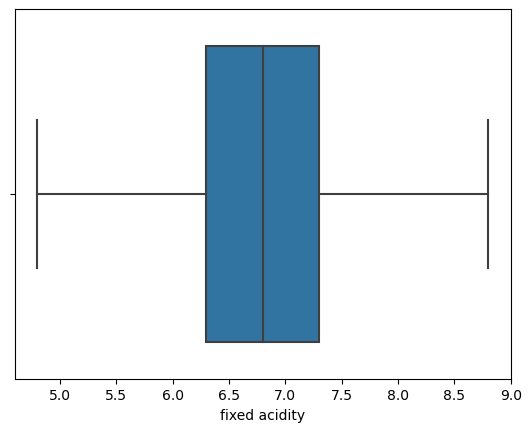

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


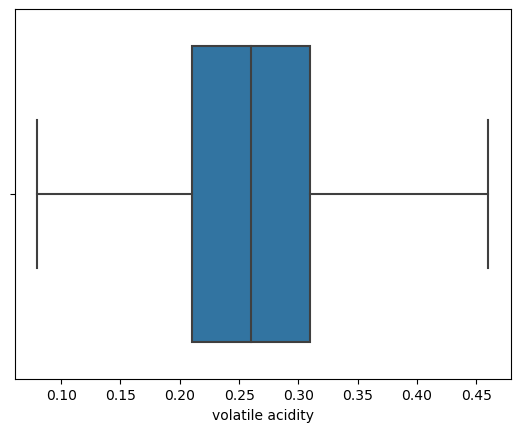

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


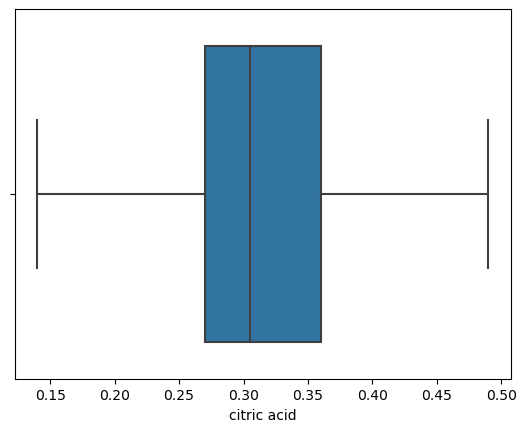

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


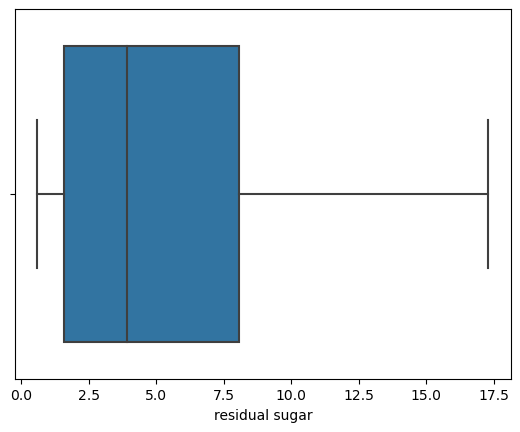

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


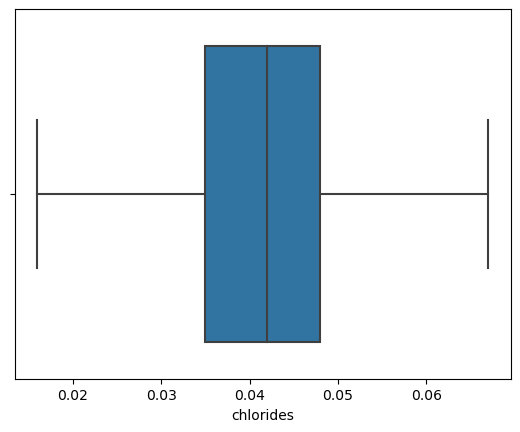

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


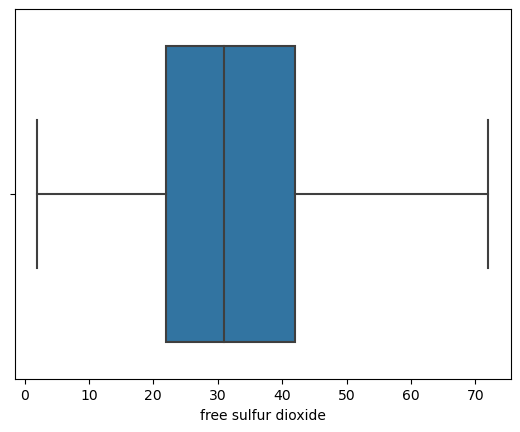

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


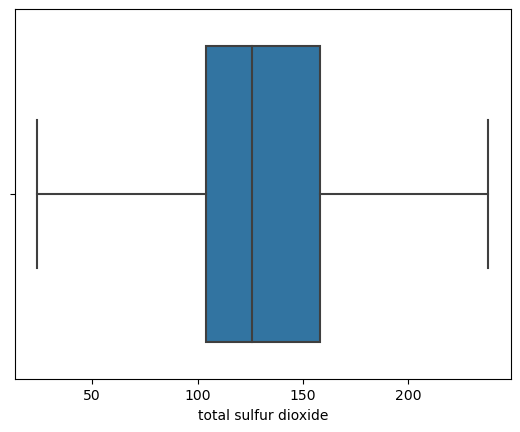

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


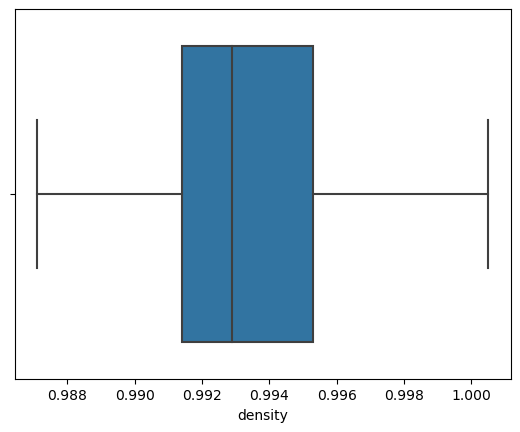

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


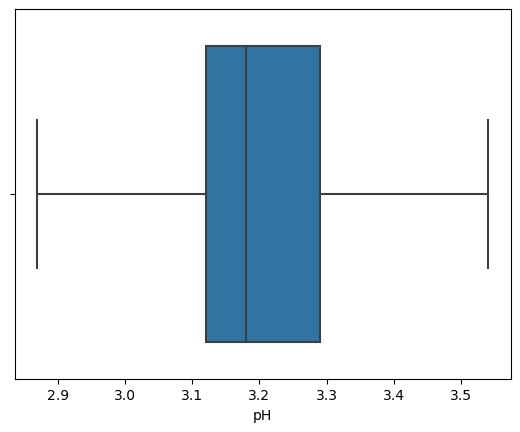

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


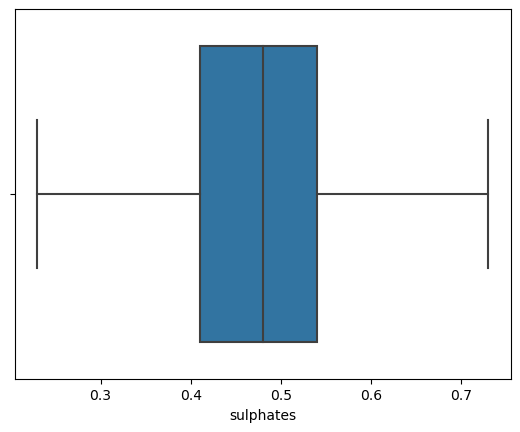

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


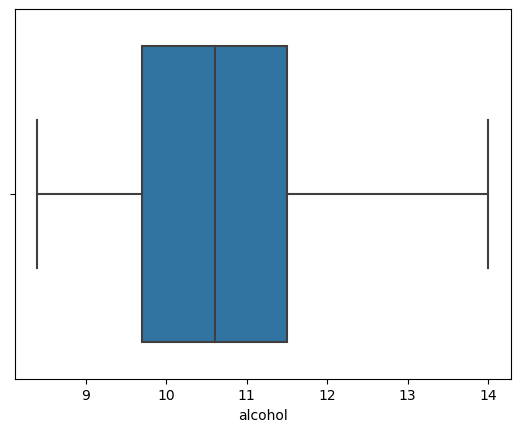

In [193]:
for i in X_train.drop("quality",axis=1).describe().columns:
   sns.boxplot(X_train[i])
   plt.show()

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


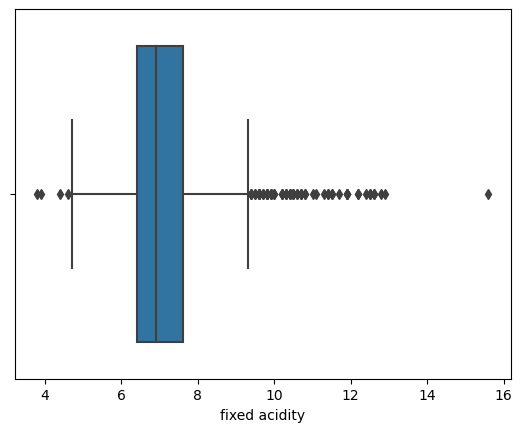

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


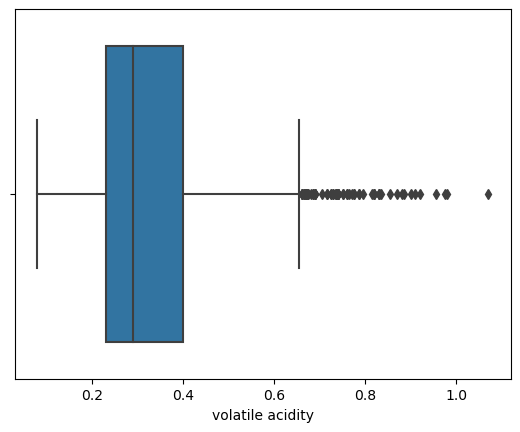

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


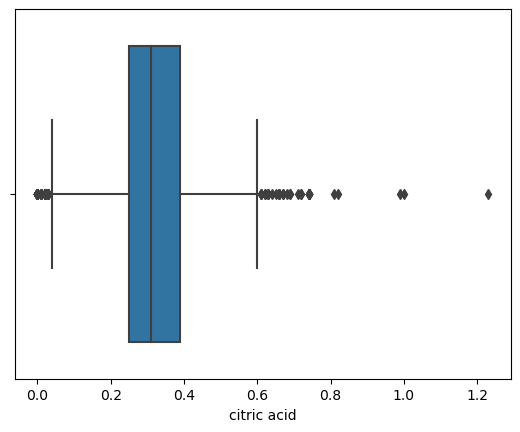

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


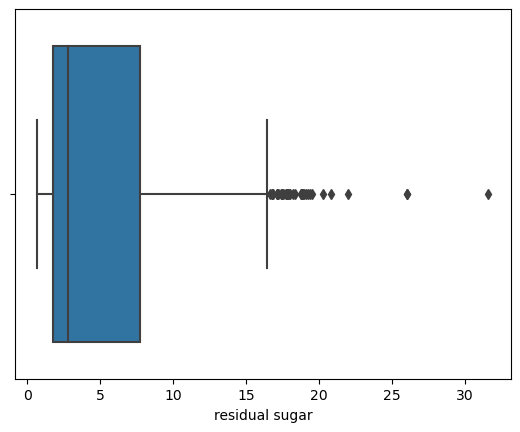

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


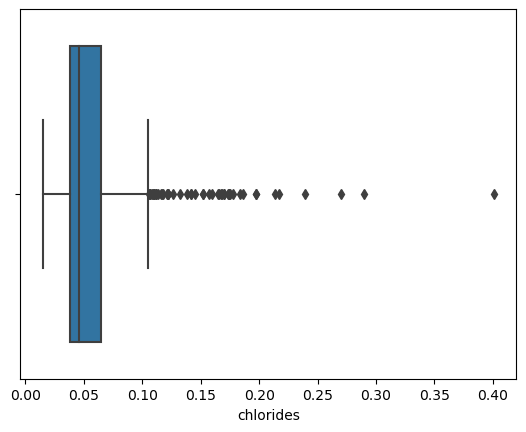

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


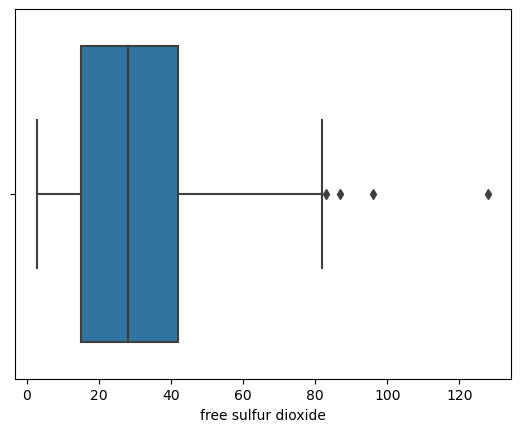

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


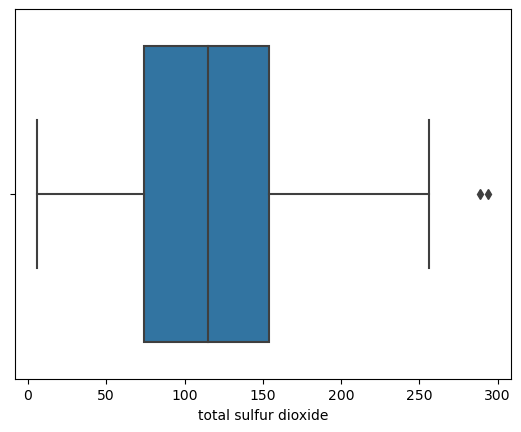

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


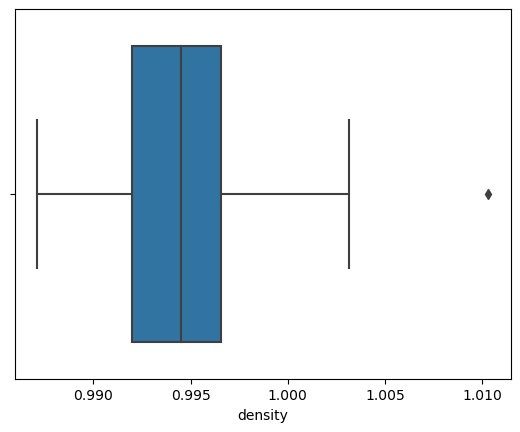

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


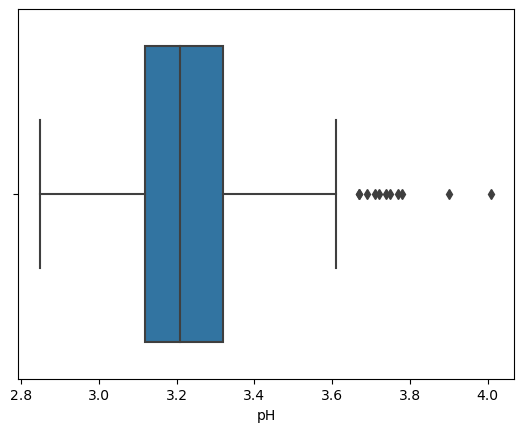

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


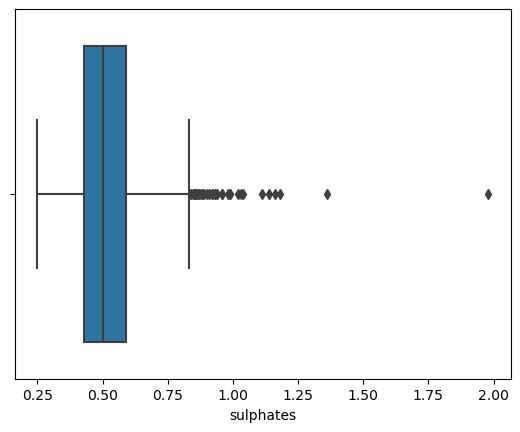

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


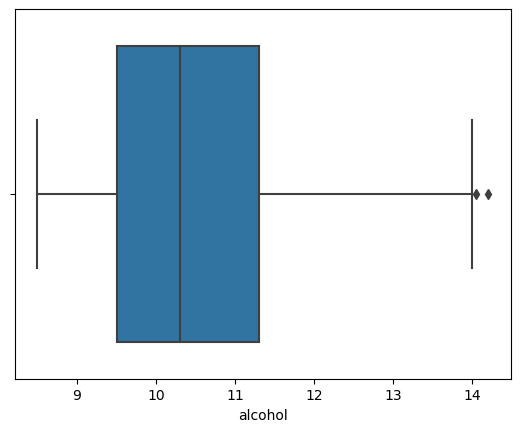

In [194]:
for i in X_test.describe().columns:
   sns.boxplot(X_test[i])
   plt.show()

In [195]:
Y_test = X_test.quality
Y_train = X_train.quality

In [196]:
X_train.drop("quality",axis=1,inplace=True)
X_test.drop("quality",axis=1,inplace=True)

## Ordinal

In [197]:
ordinal_encoder = OrdinalEncoder()
label_X_train = X_train.copy()
label_X_test = X_test.copy()
label_X_train["type"] = ordinal_encoder.fit_transform(X_train["type"].values.reshape(-1,1))
label_X_test["type"] = ordinal_encoder.transform(X_test["type"].values.reshape(-1,1))

In [198]:
print("X_train shape: ",label_X_train.shape)
print("X_test shape: ",label_X_test.shape)

X_train shape:  (2466, 12)
X_test shape:  (1097, 12)


## Normalize

In [199]:
from sklearn import preprocessing

In [200]:
min_max_scaler = preprocessing.MaxAbsScaler()
label_X_train = min_max_scaler.fit_transform(label_X_train)
label_X_test = min_max_scaler.transform(label_X_test)

In [201]:
label_X_train = pd.DataFrame(label_X_train,columns=df.drop("quality",axis=1).columns)
label_X_test = pd.DataFrame(label_X_test,columns=df.drop("quality",axis=1).columns)

In [202]:
for i in df.drop("quality",axis=1).columns:
    label_X_train[i] = label_X_train[i].astype(df[i].dtype)
    label_X_test[i] = label_X_test[i].astype(df[i].dtype)

# Model

In [203]:
models = []
models.append(('RandomForest',random_grid, RandomForestClassifier()))

In [204]:
model_cv =TrainModelCV(models,cv=5,n_jobs=-1,X_train=label_X_train,Y_train=Y_train) #RandomCV Crossvalidate

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\EMMIE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.80372913        nan 0.79845283 0.80007802        nan
 0.79886016 0.79926666        nan 0.80129177]
  warnings.warn(


In [205]:
Report(model_cv,X_train=label_X_train,Y_train=Y_train,X_test=label_X_test,Y_test=Y_test)

RandomForest
!!!!Train!!!!
              precision    recall  f1-score   support

           0       1.00      0.94      0.96      1998
           1       0.78      0.99      0.87       468

    accuracy                           0.94      2466
   macro avg       0.89      0.96      0.92      2466
weighted avg       0.96      0.94      0.95      2466

!!!!Test!!!!
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1020
           1       0.26      0.69      0.37        77

    accuracy                           0.84      1097
   macro avg       0.61      0.77      0.64      1097
weighted avg       0.92      0.84      0.87      1097

